## <font color=Green>GMD Figure 6 </font>  
#### <font color=blue> *VARIANCE DECOMPOSITION* PLOT </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
#
import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
#
# colrs = 'rcbgmyrkcbgm'
colrs = 'rcgmbyrkcbgm'

##### <font color=blue> Load Module data from </font> <mark> facts-experiments </mark>

In [2]:
# Load FACTS workflow data as a dataframe.
#
df_cpl_G = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_coupling.txt',comment = '#')
df_cpl_L = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_coupling.local.txt',comment = '#')
#
df_ark_G = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_ar5k14-221217.txt',comment = '#')
df_ark_L = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_ar5k14.local-221217.txt',comment = '#')
#
df_cpl_L
# df_ark_G

,Component,Module,sub_Module,DataFile
0,TE,tlm,sterodynamics,ocean.tlm.sterodynamics_localsl.nc
1,Glaciers,ipccar5,glaciers,ar5glaciers.ipccar5.glaciers_localsl.nc
2,Glaciers,emulandice,glaciers,emuglaciers.emulandice.glaciers_localsl.nc
3,GrIS,bamber19,icesheets,bamber19.bamber19.icesheets_GIS_localsl.nc
4,GrIS,FittedISMIP,GrIS,GrIS1f.FittedISMIP.GrIS_GIS_localsl.nc
5,GrIS,emulandice,GrIS,emuGrIS.emulandice.GrIS_localsl.nc
6,AIS,bamber19,icesheets,bamber19.bamber19.icesheets_AIS_localsl.nc
7,AIS,deconto21,AIS,deconto21.deconto21.AIS_AIS_localsl.nc
8,AIS,emulandice,AIS,emuAIS.emulandice.AIS_localsl.nc
9,AIS,larmip,AIS,larmip.larmip.AIS_localsl.nc


#### <font color=black> *Define* Functions </font>

##### <font color=blue> Input </font> <mark> Data </mark>

In [3]:
def IP_nc(DF,WF,SCENARIO,EXPDATE):
    #  
    a = [];     ccomp = []
    #
    for scenario in SCENARIO:
        for wf in WF: 
            #
            # Pick Components for each workflow.
            COMP = wf.split("-")[0]; MODULE = wf.split("-")[1]; 
            val = DF.index[ (DF['Component'] == COMP) & (DF['Module'] == MODULE) ].values[0]
            SUB_MODULE = DF["sub_Module"][val];  DATAFILE   = DF["DataFile"][val];
            #       
            # Skip if data is absent.
            if DF["DataFile"][val] == 'XXX':
                continue 
            #
            # Pick the data files & Import nc file to dataframe. 
            if SCENARIO[0][:3] == 'ssp':
                dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/coupling.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
                dataFILE    = 'coupling.{arg1}.'.format(arg1=scenario) + DF["DataFile"][val]
            elif SCENARIO[0][:3] == 'rcp':
                dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/ar5k14.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
                dataFILE    = 'ar5k14.{arg1}.'.format(arg1=scenario) + DF["DataFile"][val]
            d_nc        = xr.open_dataset(dataFOLDER + dataFILE)
            #print( "DataFILE ==> "+str(DF["DataFile"][val])+"\n"+ str(d_nc.dims) + "\n" + str(d_nc.data_vars)+ "\n" + str(d_nc.coords)+"\n"+"-------------"+"\n"+"\n" )
            #
            # Index for time.
            ST = 2020 ; EN = 2100
            YindST = np.where(d_nc["years"].values == ST)[0][0];   YindEN = np.where(d_nc["years"].values == EN)[0][0]
            # Save data into a new variable.
            ccomp.append(COMP)
            b = d_nc.sea_level_change[:,YindST:YindEN+1,0].values
            a.append(b[None,:] )
    #stack all at once
    sampsloccomponents = np.vstack(a);  sampsloccomponents = np.transpose(sampsloccomponents,(1,0,2))
    yrs=d_nc.years[YindST:YindEN+1].values
    #
    return sampsloccomponents, ccomp, yrs; 

In [ ]:
# Add the AIS to coupling local dataframe. 
# Need to create using WAIS + EAIS
# pulldata into DF

##### <font color=blue> Compute </font> <mark> Variance </mark>

In [4]:
def varV_varF(sampsloccomponents,ccomp):
    #
    varV = []; varF = [];  valIND = 0
    denom=np.var(np.sum(sampsloccomponents[:,:,:],axis = 1),axis=0)
    for co in ccomp:
        # u = np.sum(sampsloccomponents[:,0:valIND+1,:],axis = 1)
        u = sampsloccomponents[:,valIND,:]
        VAR_V=(np.var(u,axis=0))/1e6
        VAR_F=(np.var(u,axis=0))/denom
        varV.append(VAR_V)
        varF.append(VAR_F)
        valIND += 1    
    return varV, varF

# <font color=green> Experiment==> **Coupling** *(Global \& Local)* </font>

In [5]:
EXPDATE   = 221217;
# 
# ==> GLOBAL
wf1f_cpl = ['AIS-ipccar5'   , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm' ]
[slc_cpl_G_26_w1, ccomp_cpl_G_26_w1, yrs] = IP_nc(df_cpl_G,wf1f_cpl,['ssp126'],EXPDATE)
[slc_cpl_G_85_w1, ccomp_cpl_G_85_w1, yrs] = IP_nc(df_cpl_G,wf1f_cpl,['ssp585'],EXPDATE)
#
wf2f_cpl = ['AIS-larmip'    , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm']
[slc_cpl_G_26_w2, ccomp_cpl_G_26_w2, yrs] = IP_nc(df_cpl_G,wf2f_cpl,['ssp126'],EXPDATE);
[slc_cpl_G_85_w2, ccomp_cpl_G_85_w2, yrs] = IP_nc(df_cpl_G,wf2f_cpl,['ssp585'],EXPDATE);
#
wf3f_cpl = ['AIS-deconto21' , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm']
[slc_cpl_G_26_w3, ccomp_cpl_G_26_w3, yrs] = IP_nc(df_cpl_G,wf3f_cpl,['ssp126'],EXPDATE);
[slc_cpl_G_85_w3, ccomp_cpl_G_85_w3, yrs] = IP_nc(df_cpl_G,wf3f_cpl,['ssp585'],EXPDATE);
#
wf4_cpl  = ['AIS-bamber19'  , 'GrIS-bamber19'    ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm']
[slc_cpl_G_26_w4, ccomp_cpl_G_26_w4, yrs] = IP_nc(df_cpl_G,wf4_cpl,['ssp126'],EXPDATE);
[slc_cpl_G_85_w4, ccomp_cpl_G_85_w4, yrs] = IP_nc(df_cpl_G,wf4_cpl,['ssp585'],EXPDATE);
#
#
# ==> LOCAL
#
# # wf1f_cpl = ['AIS-ipccar5'   , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm' , 'VLM-kopp14' ]
# wf1f_cpl = ['AIS-emulandice'   , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm' , 'VLM-kopp14' ]
# [slc_cpl_L_26_w1, ccomp_cpl_L_26_w1, yrs] = IP_nc(df_cpl_L,wf1f_cpl,['ssp126'],EXPDATE);
# [slc_cpl_L_85_w1, ccomp_cpl_L_85_w1, yrs] = IP_nc(df_cpl_L,wf1f_cpl,['ssp585'],EXPDATE);
#
#See cell Below

#
wf2f_cpl = ['AIS-larmip'    , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm' , 'VLM-kopp14' ]
[slc_cpl_L_26_w2, ccomp_cpl_L_26_w2, yrs] = IP_nc(df_cpl_L,wf2f_cpl,['ssp126'],EXPDATE);
[slc_cpl_L_85_w2, ccomp_cpl_L_85_w2, yrs] = IP_nc(df_cpl_L,wf2f_cpl,['ssp585'],EXPDATE);
#
wf3f_cpl = ['AIS-deconto21' , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm' , 'VLM-kopp14' ]
[slc_cpl_L_26_w3, ccomp_cpl_L_26_w3, yrs] = IP_nc(df_cpl_L,wf3f_cpl,['ssp126'],EXPDATE);
[slc_cpl_L_85_w3, ccomp_cpl_L_85_w3, yrs] = IP_nc(df_cpl_L,wf3f_cpl,['ssp585'],EXPDATE);
#
wf4_cpl  = ['AIS-bamber19'  , 'GrIS-bamber19'    ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm' , 'VLM-kopp14' ]
[slc_cpl_L_26_w4, ccomp_cpl_L_26_w4, yrs] = IP_nc(df_cpl_L,wf4_cpl,['ssp126'],EXPDATE);
[slc_cpl_L_85_w4, ccomp_cpl_L_85_w4, yrs] = IP_nc(df_cpl_L,wf4_cpl,['ssp585'],EXPDATE);

In [6]:
EXPDATE   = 221217;
wf1f_cpl = ['WAIS-ipccar5', 'EAIS-ipccar5' , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm' , 'VLM-kopp14' ]
[slc_cpl_L_26_w1T, ccomp_cpl_L_26_w1T, yrs] = IP_nc(df_cpl_L,wf1f_cpl,['ssp126'],EXPDATE);
[slc_cpl_L_85_w1T, ccomp_cpl_L_85_w1T, yrs] = IP_nc(df_cpl_L,wf1f_cpl,['ssp585'],EXPDATE);
#
slc_cpl_L_26_w1         = np.empty((slc_cpl_L_26_w1T.shape[0],slc_cpl_L_26_w1T.shape[1]-1,slc_cpl_L_26_w1T.shape[2])); 
slc_cpl_L_26_w1[:]      = np.nan
slc_cpl_L_26_w1[:,1:,:] = slc_cpl_L_26_w1T[:,2:,:]
slc_cpl_L_26_w1[:,0,:]  = slc_cpl_L_26_w1T[:,0,:]+slc_cpl_L_26_w1T[:,1,:]
ccomp_cpl_L_26_w1       = ['AIS', 'GrIS' ,  'Glaciers'  ,  'LWS' , 'TE' , 'VLM' ]
#
slc_cpl_L_85_w1         = np.empty((slc_cpl_L_85_w1T.shape[0],slc_cpl_L_85_w1T.shape[1]-1,slc_cpl_L_85_w1T.shape[2])); 
slc_cpl_L_85_w1[:]      = np.nan
slc_cpl_L_85_w1[:,1:,:] = slc_cpl_L_85_w1T[:,2:,:]
slc_cpl_L_85_w1[:,0,:]  = slc_cpl_L_85_w1T[:,0,:]+slc_cpl_L_85_w1T[:,1,:]
ccomp_cpl_L_85_w1 = ['AIS', 'GrIS' ,  'Glaciers'  ,  'LWS' , 'TE' , 'VLM' ]


# <font color=green> PLOT==> **Coupling** *(Global \& Local)* </font>

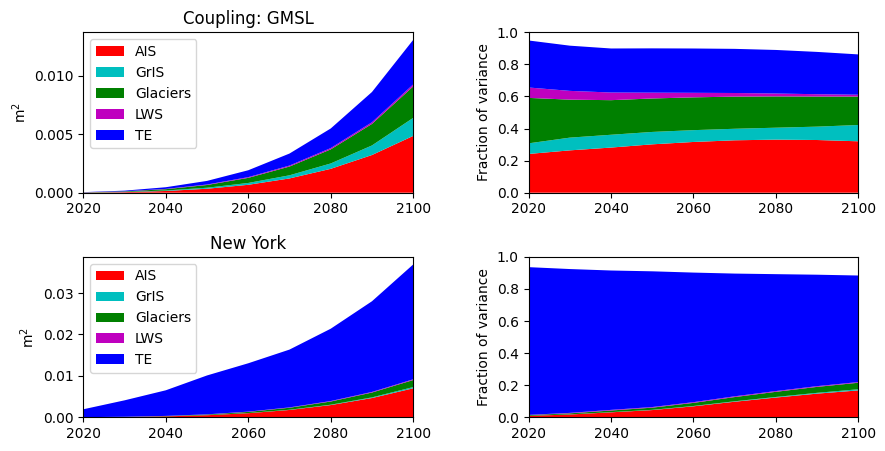

In [7]:
sampsloccomponents = slc_cpl_G_85_w1;      ccomp = ccomp_cpl_G_85_w1;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
#
plt.subplots(figsize=(10, 5));
#
# Varince.
plt.subplot(2, 2, 1); 
plt.stackplot(yrs,varV[0],varV[1], varV[2], varV[3], varV[4], labels=ccomp, colors=colrs);
plt.legend(loc='upper left'); plt.title('Coupling: GMSL'); plt.xlabel(''); plt.ylabel('m$^2$');
plt.xlim([2020, 2100]);
#
# Fraction of variance.
plt.subplot(2, 2, 2);   plt.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
plt.title(''); plt.xlabel(''); plt.ylabel('Fraction of variance');
plt.xlim([2020, 2100]); plt.ylim([0, 1])
#
#
sampsloccomponents = slc_cpl_L_85_w1;      ccomp = ccomp_cpl_L_85_w1;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
#
# Varince.
# plt.subplot(2, 2, 3);   plt.stackplot(yrs,varV[0],varV[1], varV[2], varV[3], varV[4],varV[5], labels=ccomp, colors=colrs);
plt.subplot(2, 2, 3);   plt.stackplot(yrs,varV[0],varV[1], varV[2], varV[3], varV[4], labels=ccomp, colors=colrs);
plt.legend(loc='upper left');   plt.title('New York'); plt.xlabel(''); plt.ylabel('m$^2$');
plt.xlim([2020, 2100])
#
# Fraction of variance.
# plt.subplot(2, 2, 4);   plt.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], varV[5],labels=ccomp, colors=colrs);
plt.subplot(2, 2, 4);   plt.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4],labels=ccomp, colors=colrs);
plt.title(''); plt.xlabel(''); plt.ylabel('Fraction of variance');
plt.xlim([2020, 2100]);     plt.ylim([0, 1])
#
plt.subplots_adjust(wspace=0.35, hspace=0.4)
#
#
plt.show()

# <font color=green> PLOT==> **Coupling** *(Global)* ssp/wf</font>

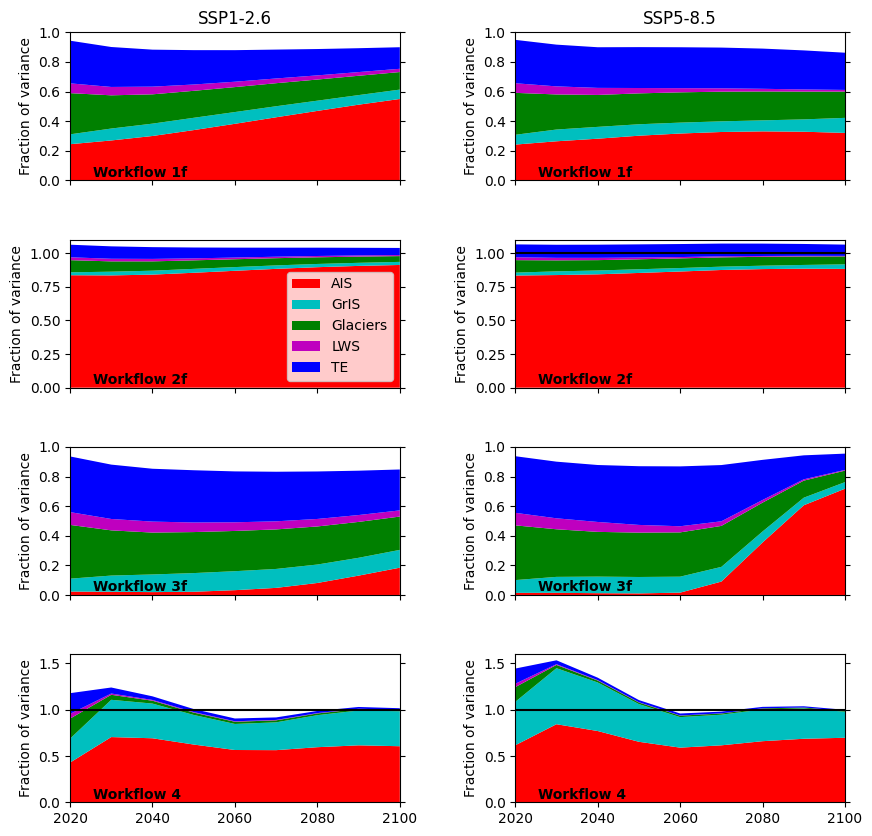

In [8]:
#
plt.subplots(figsize=(10, 10));
#
#
# ---------   SSP126
#
sampsloccomponents = slc_cpl_G_26_w1;      ccomp = ccomp_cpl_G_26_w1;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax = plt.subplot(4, 2, 1); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
ax.set_title('SSP1-2.6'); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1]);
ax.xaxis.set_ticklabels([])
ax.text(.07, .1, 'Workflow 1f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_G_26_w2;      ccomp = ccomp_cpl_G_26_w2;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax = plt.subplot(4, 2, 3); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1.1]);
# ax.set_xlim([2020, 2100]);ax.set_ylim([0, ax.get_ylim()[1]+0.02]); ax.axhline(y=1,color='black')
#==>
ax.xaxis.set_ticklabels([])
ax.legend(loc='lower right');
ax.text(.07, .1, 'Workflow 2f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_G_26_w3;      ccomp = ccomp_cpl_G_26_w3;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 5); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1]);
ax.xaxis.set_ticklabels([])
ax.text(.07, .1, 'Workflow 3f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_G_26_w4;      ccomp = ccomp_cpl_G_26_w4;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 7); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1.6]); ax.axhline(y=1,color='black')
# ax.set_xlim([2020, 2100]);ax.set_ylim([0, ax.get_ylim()[1]+0.05]); ax.axhline(y=1,color='black')
#==>
ax.text(.07, .1, 'Workflow 4', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
# ---------   SSP585
#
#
sampsloccomponents = slc_cpl_G_85_w1;      ccomp = ccomp_cpl_G_85_w1;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax = plt.subplot(4, 2, 2); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
ax.set_title('SSP5-8.5'); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1]);
ax.xaxis.set_ticklabels([])
ax.text(.07, .1, 'Workflow 1f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_G_85_w2;      ccomp = ccomp_cpl_G_85_w2;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 4); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1.1]); ax.axhline(y=1,color='black')
# ax.set_xlim([2020, 2100]);ax.set_ylim([0, ax.get_ylim()[1]+0.02]); ax.axhline(y=1,color='black')
#==>
ax.xaxis.set_ticklabels([])
ax.text(.07, .1, 'Workflow 2f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_G_85_w3;      ccomp = ccomp_cpl_G_85_w3;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 6); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1]);
ax.xaxis.set_ticklabels([])
ax.text(.07, .1, 'Workflow 3f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_G_85_w4;      ccomp = ccomp_cpl_G_85_w4;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 8); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1.6]);ax.axhline(y=1,color='black')
# ax.set_xlim([2020, 2100]);ax.set_ylim([0, ax.get_ylim()[1]+0.05]); ax.axhline(y=1,color='black')
#==>
ax.text(.07, .1, 'Workflow 4', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')




# ---------

#
plt.subplots_adjust(wspace=0.35, hspace=0.4)
#
#
# plt.savefig("Fig6_G_quad.pdf", format="pdf", bbox_inches="tight")
plt.show()

# <font color=green> PLOT==> **Coupling** *(Local)* ssp/wf</font>

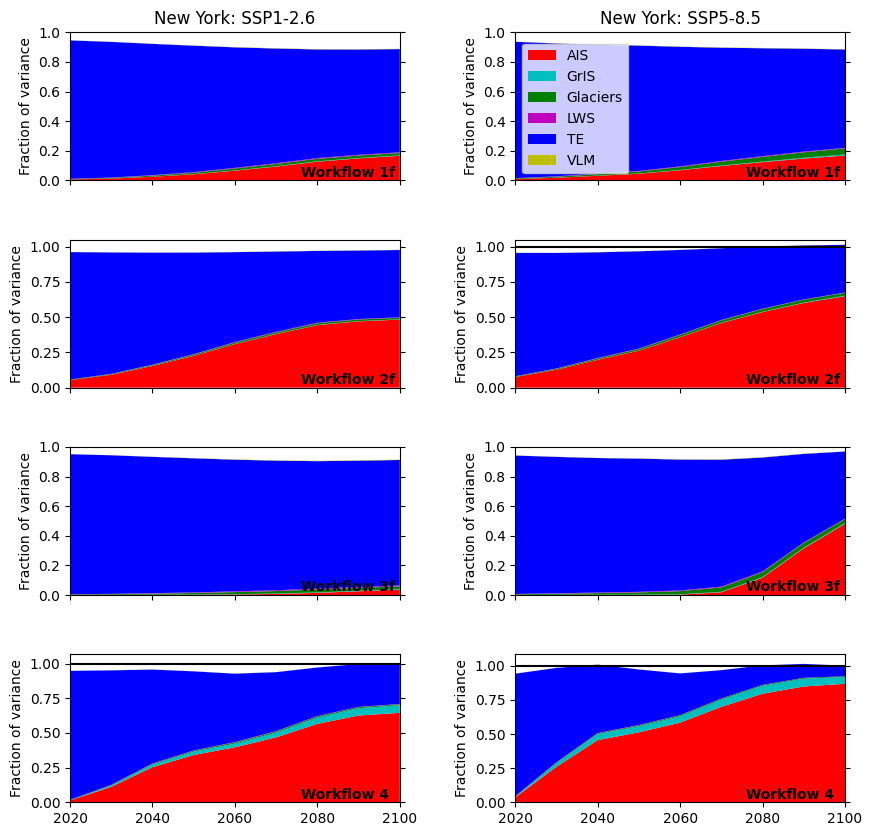

In [9]:
#
plt.subplots(figsize=(10, 10));
#
#
# ---------   SSP126
#
sampsloccomponents = slc_cpl_L_26_w1;      ccomp = ccomp_cpl_L_26_w1;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax = plt.subplot(4, 2, 1); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], varF[5],labels=ccomp, colors=colrs);
ax.set_title('New York: SSP1-2.6'); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1]);
ax.xaxis.set_ticklabels([])
ax.text(.7, .1, 'Workflow 1f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_L_26_w2;      ccomp = ccomp_cpl_L_26_w2; ccomp[4] = 'SD'
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax = plt.subplot(4, 2, 3); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4],  varF[5],labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1.05]);
ax.xaxis.set_ticklabels([])
# ax.legend(loc='lower right');
ax.text(.7, .1, 'Workflow 2f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_L_26_w3;      ccomp = ccomp_cpl_L_26_w3; 
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 5); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4],  varF[5],labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1]);
ax.xaxis.set_ticklabels([])
ax.text(.7, .1, 'Workflow 3f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_L_26_w4;      ccomp = ccomp_cpl_L_26_w4;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 7); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4],  varF[5],labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
# ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1.3]); ax.axhline(y=1,color='black')
ax.set_xlim([2020, 2100]);ax.set_ylim([0, ax.get_ylim()[1]+0.02]); ax.axhline(y=1,color='black')
#==>
ax.text(.7, .1, 'Workflow 4', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
# ---------   SSP585
#
#
sampsloccomponents = slc_cpl_L_85_w1;      ccomp = ccomp_cpl_L_85_w1;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax = plt.subplot(4, 2, 2); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4],  varF[5],labels=ccomp, colors=colrs);
ax.set_title('New York: SSP5-8.5'); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1]);
ax.xaxis.set_ticklabels([])
ax.legend(loc='lower left');
ax.text(.7, .1, 'Workflow 1f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_L_85_w2;      ccomp = ccomp_cpl_L_85_w2;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 4); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4],  varF[5],labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1.05]); ax.axhline(y=1,color='black')
# ax.set_xlim([2020, 2100]);ax.set_ylim([0, ax.get_ylim()[1]+0.02]); ax.axhline(y=1,color='black')
#==>
ax.xaxis.set_ticklabels([])
ax.text(.7, .1, 'Workflow 2f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_L_85_w3;      ccomp = ccomp_cpl_L_85_w3;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 6); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4],  varF[5],labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1]);
ax.xaxis.set_ticklabels([])
ax.text(.7, .1, 'Workflow 3f', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
#
sampsloccomponents = slc_cpl_L_85_w4;      ccomp = ccomp_cpl_L_85_w4;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
# Fraction of variance.
ax=plt.subplot(4, 2, 8); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4],  varF[5],labels=ccomp, colors=colrs);
ax.set_title(''); ax.set_xlabel(''); ax.set_ylabel('Fraction of variance');
# ax.set_xlim([2020, 2100]); ax.set_ylim([0, 1.3]); ax.axhline(y=1,color='black')
ax.set_xlim([2020, 2100]);ax.set_ylim([0, ax.get_ylim()[1]+0.02]); ax.axhline(y=1,color='black')
#==>
ax.text(.7, .1, 'Workflow 4', horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
#
# ---------

#
plt.subplots_adjust(wspace=0.35, hspace=0.4)
#
#
plt.savefig("Fig6_L_quad.pdf", format="pdf", bbox_inches="tight")
plt.show()

# <font color=black> **=======================================================================** </font>

# <font color=green> Experiment==> **ar5kopp14** *(Global \& Local)* </font>

In [ ]:
EXPDATE   = 221217;
# 
wf1f_ark = ['AIS-kopp14'   , 'GrIS-kopp14' ,  'Glaciers-kopp14'  ,  'LWS-kopp14' , 'TE-kopp14']
[slc_ark_G_26_w1, ccomp_cpl_G_26_w1, yrs] = IP_nc(df_ark_G,wf1f_ark,['rcp26'],EXPDATE);
[slc_ark_G_85_w1, ccomp_ark_G_85_w1, yrs] = IP_nc(df_ark_G,wf1f_ark,['rcp85'],EXPDATE);
#
wf2f_ark = ['AIS-kopp14'   , 'GrIS-kopp14' ,  'Glaciers-kopp14'  ,  'LWS-kopp14' , 'TE-kopp14']
[slc_ark_G_26_w2, ccomp_ark_G_26_w2, yrs] = IP_nc(df_ark_G,wf2f_ark,['rcp26'],EXPDATE);
[slc_ark_G_85_w2, ccomp_ark_G_85_w2, yrs] = IP_nc(df_ark_G,wf2f_ark,['rcp85'],EXPDATE);
#
wf3f_ark = ['AIS-kopp14'   , 'GrIS-kopp14' ,  'Glaciers-kopp14'  ,  'LWS-kopp14' , 'TE-kopp14']
[slc_ark_G_26_w3, ccomp_ark_G_26_w3, yrs] = IP_nc(df_ark_G,wf3f_ark,['rcp26'],EXPDATE);
[slc_ark_G_85_w3, ccomp_ark_G_85_w3, yrs] = IP_nc(df_ark_G,wf3f_ark,['rcp85'],EXPDATE);
#
wf4_ark = ['AIS-kopp14'   , 'GrIS-kopp14' ,  'Glaciers-kopp14'  ,  'LWS-kopp14' , 'TE-kopp14']
[slc_ark_G_26_w4, ccomp_ark_G_26_w4, yrs] = IP_nc(df_ark_G,wf4_ark,['rcp26'],EXPDATE);
[slc_ark_G_85_w4, ccomp_ark_G_85_w4, yrs] = IP_nc(df_ark_G,wf4_ark,['rcp85'],EXPDATE);
#
#
#
#
# Note that AIS kopp14 is missing for local
wf1f_ark = ['AIS-deconto16', 'GrIS-kopp14' ,  'Glaciers-kopp14'  ,  'LWS-kopp14' , 'TE-kopp14', 'VLM-kopp14']
[slc_ark_L_26_w1, ccomp_ark_L_26_w1, yrs] = IP_nc(df_ark_L,wf1f_ark,['rcp26'],EXPDATE);
[slc_ark_L_85_w1, ccomp_ark_L_85_w1, yrs] = IP_nc(df_ark_L,wf1f_ark,['rcp85'],EXPDATE);
#
wf2f_ark = ['AIS-deconto16', 'GrIS-kopp14' ,  'Glaciers-kopp14'  ,  'LWS-kopp14' , 'TE-kopp14', 'VLM-kopp14']
[slc_ark_L_26_w2, ccomp_ark_L_26_w2, yrs] = IP_nc(df_ark_L,wf2f_ark,['rcp26'],EXPDATE);
[slc_ark_L_85_w2, ccomp_ark_L_85_w2, yrs] = IP_nc(df_ark_L,wf2f_ark,['rcp85'],EXPDATE);
#
wf3f_ark = ['AIS-deconto16', 'GrIS-kopp14' ,  'Glaciers-kopp14'  ,  'LWS-kopp14' , 'TE-kopp14', 'VLM-kopp14']
[slc_ark_L_26_w3, ccomp_ark_L_26_w3, yrs] = IP_nc(df_ark_L,wf3f_ark,['rcp26'],EXPDATE);
[slc_ark_L_85_w3, ccomp_ark_L_85_w3, yrs] = IP_nc(df_ark_L,wf3f_ark,['rcp85'],EXPDATE);
#
wf4_ark = ['AIS-deconto16', 'GrIS-kopp14' ,  'Glaciers-kopp14'  ,  'LWS-kopp14' , 'TE-kopp14', 'VLM-kopp14']
[slc_ark_L_26_w4, ccomp_ark_L_26_w4, yrs] = IP_nc(df_ark_L,wf4_ark,['rcp26'],EXPDATE);
[slc_ark_L_85_w4, ccomp_ark_L_85_w4, yrs] = IP_nc(df_ark_L,wf4_ark,['rcp85'],EXPDATE);

# <font color=green> PLOT==> **ar5kopp14** *(Global \& Local)* </font>

In [ ]:
sampsloccomponents = slc_ark_G_85_w1;      ccomp = ccomp_ark_G_85_w1;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
#
plt.subplots(figsize=(10, 5));
#
# Varince.
plt.subplot(2, 2, 1); 
plt.stackplot(yrs,varV[0],varV[1], varV[2], varV[3], varV[4], labels=ccomp, colors=colrs);
plt.legend(loc='upper left'); plt.title('ar5kopp14: GMSL'); plt.xlabel(''); plt.ylabel('m$^2$');
plt.xlim([2020, 2100]);
#
# Fraction of variance.
plt.subplot(2, 2, 2);   plt.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
plt.title(''); plt.xlabel(''); plt.ylabel('Fraction of variance');
plt.xlim([2020, 2100]); plt.ylim([0, 1])
#
#
sampsloccomponents = slc_ark_L_85_w1;      ccomp = ccomp_ark_L_85_w1;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
#
# Varince.
plt.subplot(2, 2, 3);   plt.stackplot(yrs,varV[0],varV[1], varV[2], varV[3], varV[4],varV[5], labels=ccomp, colors=colrs);
plt.legend(loc='upper left');   plt.title('New York'); plt.xlabel(''); plt.ylabel('m$^2$');
plt.xlim([2020, 2100])
#
# Fraction of variance.
plt.subplot(2, 2, 4);   plt.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], varV[5],labels=ccomp, colors=colrs);
plt.title(''); plt.xlabel(''); plt.ylabel('Fraction of variance');
plt.xlim([2020, 2100]);     plt.ylim([0, 1])
#
plt.subplots_adjust(wspace=0.35, hspace=0.4)
#
#
plt.show()

# <font color=black> **=======================================================================** </font>